In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from astropy.io import fits
import astropy.io.fits as pyfits
from astropy import units as u
from scipy import interpolate
from matplotlib.ticker import AutoMinorLocator

In [2]:
dir = '7-20211101-20220619/'
# dir = '6-20200915-20210503/'
# dir = '4-20180918-20190528/'
# dir = '3B-20180206-20180622/'
# dir = '8-20220818-20230223/'
# dir = '1-20150918-20160527/'
# dir = '2-20160913-20170615/'
# dir = '3A-20170919-20180123/'
# dir = '5-20190928-20200608/'
# dir = 'all-20150918-20230223/'


lc_file_path = 'Output/Light_curve_001/4fgl_j0854.8+2006_lightcurve.fits'
emin = 0.1 *u.GeV
emax = 300 *u.GeV
D_l = 1588.6 *u.Mpc
hdul = fits.open('./' + dir+lc_file_path)
lc = hdul[1].data

In [3]:
np.diff((lc['tmin_mjd'] + lc['tmax_mjd'])/2)

array([11.5, 11.5, 11.5, 11.5, 11.5, 11.5, 11.5, 11.5, 11.5, 11.5, 11.5,
       11.5, 11.5, 11.5, 11.5, 11.5, 11.5, 11.5, 11.5])

/tmp/ipykernel_18919/37359773.py:88: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  flux_continuum[j] = np.array((10 ** -scale ) * ul[i])


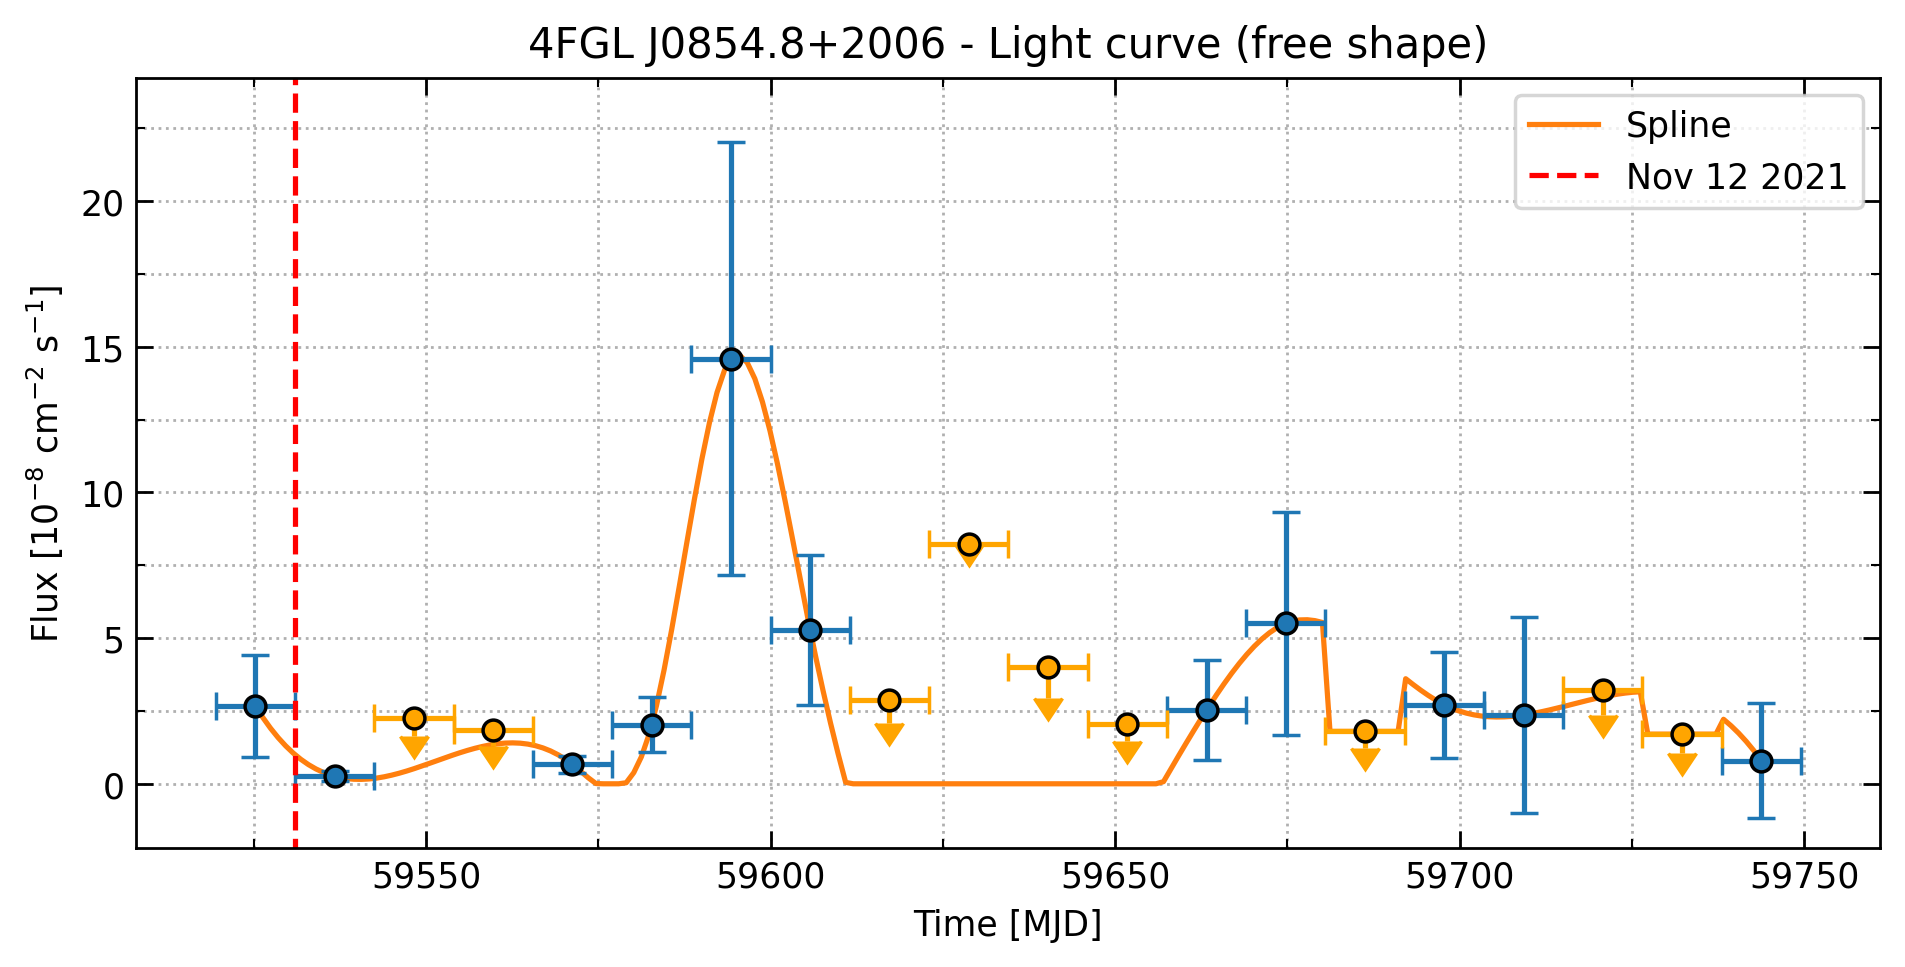

In [7]:
TSmin = 9
################################################
########## LC energy flux
################################################
if len(lc['eflux'][lc['ts']>TSmin]) > 0:
    scale = int(np.log10(lc['eflux'][lc['ts']>TSmin].max())) -2
else:
    scale = int(np.log10(lc['eflux_ul95'].max())) -2
    
tmean = (lc['tmin_mjd'] + lc['tmax_mjd'])/2


if len(tmean[lc['ts']>TSmin]) > 9:
    time_continuum = np.linspace(np.min(lc['tmin_mjd']),np.max(lc['tmax_mjd']),10*len(lc['tmin_mjd']))
    tck_eflux = interpolate.splrep(tmean[lc['ts']>TSmin], (10**-scale)*lc['eflux'][lc['ts']>TSmin], k=3)
    tck_eflux_error = interpolate.splrep(tmean[lc['ts']>TSmin], (10**-scale)*lc['eflux_err'][lc['ts']>TSmin],k=3)

    eflux_continuum = interpolate.splev(time_continuum, tck_eflux)
    eflux_continuum_err = interpolate.splev(time_continuum, tck_eflux_error)
    # ax.plot(time_continuum,eflux_continuum,color="C1", label="Spline")
    
    

if len(lc['eflux'][lc['ts']>TSmin]) > 0:
    y0 = (lc['eflux'][lc['ts']>TSmin]).max()
    y1 = (lc['eflux'][lc['ts']>TSmin] + lc['eflux_err'][lc['ts']>TSmin]).max()
    if y1 > 4*y0:
        y1 = 4*y0
    
    if len(lc['eflux_ul95'][lc['ts']<=TSmin]) > 0:
        y2 = (lc['eflux_ul95'][lc['ts']<=TSmin]).max()
        if y2 > y1:
            y1 = y2
    
else:
    y1 = (lc['eflux_ul95'][lc['ts']<=TSmin]).max()
    
ymin = -(10**-scale)*0.1*y1
################################################
########## LC photon flux
################################################
f = plt.figure(figsize=(9,4),dpi=250)
ax = f.add_subplot(1,1,1)
ax.xaxis.set_minor_locator(AutoMinorLocator(2))
ax.yaxis.set_minor_locator(AutoMinorLocator(2))
ax.tick_params(which='major', length=5, direction='in')
ax.tick_params(which='minor', length=2.5, direction='in',bottom=True, top=True, left=True, right=True)
ax.tick_params(bottom=True, top=True, left=True, right=True)
ax.grid(linestyle=':',which='both')

if len(lc['flux'][lc['ts']>TSmin]) > 0:
    scale = int(np.log10(lc['flux'][lc['ts']>TSmin].max())) -2
else:
    scale = int(np.log10(lc['flux_ul95'].max())) -2

if len(tmean[lc['ts']>TSmin]) > 2:
    # time_continuum = np.linspace(np.min(lc['tmin_mjd']),np.max(lc['tmax_mjd']),10*len(lc['tmin_mjd']))
    # tck_eflux = interpolate.splrep(tmean[lc['ts']>TSmin], (10**-scale)*lc['eflux'][lc['ts']>TSmin], k=3)
    # tck_eflux_error = interpolate.splrep(tmean[lc['ts']>TSmin], (10**-scale)*lc['eflux_err'][lc['ts']>TSmin],k=3)

    # eflux_continuum = interpolate.splev(time_continuum, tck_eflux)
    # eflux_continuum_err = interpolate.splev(time_continuum, tck_eflux_error)
    # ax.plot(time_continuum,eflux_continuum,color="C1", label="Spline")
    
    # Saving Spline

    time_continuum = np.linspace(np.min(tmean),np.max(tmean[lc['ts']>TSmin]),10*len(lc['tmin_mjd']))
    tck_flux = interpolate.splrep(tmean[lc['ts']>TSmin], (10**-scale)*lc['flux'][lc['ts']>TSmin], k=3)
    tck_flux_error = interpolate.splrep(tmean[lc['ts']>TSmin], (10**-scale)*lc['flux_err'][lc['ts']>TSmin],k=3)

    flux_continuum = interpolate.splev(time_continuum, tck_flux)
    flux_continuum_err = interpolate.splev(time_continuum, tck_flux_error)

    # Constraining the spline within upper limits
    ul_idx = np.argwhere(lc['ts']<=TSmin)

    ul_timebin_l_wall = lc['tmin_mjd'][ul_idx]
    ul_timebin_r_wall = lc['tmax_mjd'][ul_idx]
    ul_timebin_center = tmean[ul_idx]
    ul = lc['flux_ul95'][ul_idx]

    # for each bin, clip the spline to the upper limit  

    for i in range(len(ul)):
        for j in range(len(time_continuum)):
            if time_continuum[j] >= ul_timebin_l_wall[i] and time_continuum[j] < ul_timebin_r_wall[i]:
                if flux_continuum[j] > np.array((10 ** -scale ) * ul[i]):
                    flux_continuum[j] = np.array((10 ** -scale ) * ul[i])
                    pass
    


    # ul_func= interpolate.interp1d(tmean[lc['ts']<=TSmin], (10**-scale)*lc['flux_ul95'][ul], fill_value="extrapolate", kind='cubic')


    # Clip the spline to keep it above 0
    flux_continuum = np.clip(flux_continuum,0,None)


    
    


    
    # time_continuum = time_continuum[flux_continuum>0]
    # flux_continuum_err = flux_continuum_err[flux_continuum>0]
    # flux_continuum = flux_continuum[flux_continuum>0]
    # ax.plot(time_continuum,flux_continuum,color="C1", label="Spline")
    ax.plot(time_continuum,flux_continuum,color="C1", label="Spline")
    
    # col_flux = pyfits.Column(name="flux_continuum",array=flux_continuum,format="D",unit="10^"+str(scale)+" ph cm-2 s-1")
    # col_flux_err = pyfits.Column(name="flux_err_continuum",array=flux_continuum_err,format="D",unit="10^"+str(scale)+" ph cm-2 s-1")
    # all_cols = pyfits.BinTableHDU.from_columns([col_time, col_eflux, col_eflux_err, col_flux, col_flux_err])       
    flux_ul_yerr = np.zeros(len(lc['flux_err']))
    flux_yerr = np.zeros(len(lc['flux_err']))
    for i in range(len(lc['flux_err'])):
        if abs(lc['flux_ul95'][i]) <= abs(lc['flux_err'][i]):
            flux_ul_yerr[i] =  lc['flux_ul95'][i] - 1e-12

        if abs(lc['flux'][i]) <= abs(lc['flux_err'][i]):
            flux_yerr[i] = lc['flux'][i] - 1e-12
            
    
plt.errorbar(tmean[lc['ts']>TSmin], (10**-scale)*lc['flux'][lc['ts']>TSmin], xerr = [ tmean[lc['ts']>TSmin]- lc['tmin_mjd'][lc['ts']>TSmin], lc['tmax_mjd'][lc['ts']>TSmin] - tmean[lc['ts']>TSmin] ], yerr=(10**-scale)*lc['flux_err'][lc['ts']>TSmin], markeredgecolor='black', fmt='o', capsize=4)
plt.errorbar(tmean[lc['ts']<=TSmin], (10**-scale)*lc['flux_ul95'][lc['ts']<=TSmin], xerr = [ tmean[lc['ts']<=TSmin]- lc['tmin_mjd'][lc['ts']<=TSmin], lc['tmax_mjd'][lc['ts']<=TSmin] - tmean[lc['ts']<=TSmin] ], yerr=10**(-scale ) * np.abs(lc['flux_err'][lc['ts']<=TSmin]), markeredgecolor='black', fmt='o', uplims=True, color='orange', capsize=4)
plt.ylabel(r'Flux [$10^{'+str(scale)+'}$ cm$^{-2}$ s$^{-1}$]')
plt.xlabel('Time [MJD]')
# plt.title(self.sourcename+' - Light curve (free shape)')


if len(lc['flux'][lc['ts']>TSmin]) > 0:
    y0 = (lc['flux'][lc['ts']>TSmin]).max()
    y1 = (lc['flux'][lc['ts']>TSmin] + lc['flux_err'][lc['ts']>TSmin]).max()
    if y1 > 4*y0:
        y1 = 4*y0
    
    if len(lc['flux_ul95'][lc['ts']<=TSmin]) > 0:
        y2 = (lc['flux_ul95'][lc['ts']<=TSmin]).max()
        if y2 > y1:
            y1 = y2
    
else:
    y1 = (lc['flux_ul95'][lc['ts']<=TSmin]).max()

plt.title("4FGL J0854.8+2006 - Light curve (free shape)")

plt.vlines(59531, ymin,(10**-scale)*1.1*y1, color='red', linestyle='--', label='Nov 12 2021') # Segment 7
ymin = -(10**-scale)*0.1*y1               
plt.ylim(ymin,(10**-scale)*1.1*y1)
plt.legend()

# plt.savefig('./temp/Segment-7/Quickplot_LC_20_bins.pdf',bbox_inches='tight')
# plt.savefig('./temp/Segment-6/Quickplot_LC_10_bins.pdf',bbox_inches='tight')
# plt.savefig('./temp/Segment-4/Quickplot_LC_7_bins.pdf',bbox_inches='tight')
# plt.savefig('./temp/Segment-3B/Quickplot_LC_8_bins.pdf',bbox_inches='tight')
# plt.savefig('./temp/Segment-8/Quickplot_LC_20_bins.pdf',bbox_inches='tight')

In [5]:
lc['flux_err'][lc['ts']<=TSmin] * (10**-scale)

array([6.30784143e-01, 5.79822925e-01, 7.82532907e-01, 5.26157594e-04,
       1.03801046e+00, 5.74962799e-01, 5.82705435e-01, 8.55075783e-01,
       6.46880218e-01])

In [6]:
np.minimum([1, 3, 6], [0, 8, 6])


array([0, 3, 6])

In [7]:
flux_ul_yerr[lc['ts']<=TSmin]

array([0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [8]:
len(tck_flux)

3